In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrwellsdavid/unsw-nb15")

print("Path to dataset files:", path)

100%|██████████| 149M/149M [00:00<00:00, 186MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1


In [ ]:
import os

# Define the dataset path from your output
dataset_path = '/root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1'

# List all files in the directory
files = os.listdir(dataset_path)
print("Files in dataset directory:", files)

Files in dataset directory: ['UNSW-NB15_4.csv', 'UNSW-NB15_2.csv', 'UNSW_NB15_training-set.csv', 'UNSW_NB15_testing-set.csv', 'NUSW-NB15_features.csv', 'UNSW-NB15_1.csv', 'UNSW-NB15_LIST_EVENTS.csv', 'UNSW-NB15_3.csv']


In [ ]:
import pandas as pd

train_path = os.path.join(dataset_path, 'UNSW_NB15_training-set.csv')
test_path = os.path.join(dataset_path, 'UNSW_NB15_testing-set.csv')

if os.path.exists(train_path):
    train_sample = pd.read_csv(train_path, nrows=5)
    print("\nFirst 5 rows of training set:\n", train_sample.head())
else:
    print("Training CSV not found!")

if os.path.exists(test_path):
    test_sample = pd.read_csv(test_path, nrows=5)
    print("\nFirst 5 rows of testing set:\n", test_sample.head())
else:
    print("Testing CSV not found!")


First 5 rows of training set:
    id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                 1               2             0   
1  125000.0003  ...                 1               2             0   
2  200000.0051  ...                 1               3             0   
3  166666.6608  ...                 1               3             0   
4  100000.0025  ...                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1       

In [ ]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Combine into one dataframe for unified processing
full_df = pd.concat([train_df, test_df], ignore_index=True)
print("Combined dataframe shape:", full_df.shape)

# Inspect columns and data types
print("\nColumns:", full_df.columns.tolist())
print("\nData types:\n", full_df.dtypes)

# Sample inspection: First 5 rows
print("\nFirst 5 rows:\n", full_df.head())

Combined dataframe shape: (257673, 45)

Columns: ['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']

Data types:
 id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss         

In [ ]:

relevant_categories = ['Normal', 'DoS', 'Reconnaissance']
filtered_df = full_df[full_df['attack_cat'].isin(relevant_categories)]

# Check class distribution
print("Class distribution after filtering:\n", filtered_df['attack_cat'].value_counts())


normal_samples = filtered_df[filtered_df['attack_cat'] == 'Normal'].sample(n=13000, random_state=42)
dos_samples = filtered_df[filtered_df['attack_cat'] == 'DoS'].sample(n=13000, random_state=42)
recon_samples = filtered_df[filtered_df['attack_cat'] == 'Reconnaissance'].sample(n=13000, random_state=42)

balanced_df = pd.concat([normal_samples, dos_samples, recon_samples], ignore_index=True)
print("\nBalanced dataframe shape:", balanced_df.shape)
print("Balanced class distribution:\n", balanced_df['attack_cat'].value_counts())

# Split into train (80%) and test (20%), stratified by 'attack_cat'
from sklearn.model_selection import train_test_split
train_balanced, test_balanced = train_test_split(balanced_df, test_size=0.2, stratify=balanced_df['attack_cat'], random_state=42)

print("\nTrain shape:", train_balanced.shape)
print("Test shape:", test_balanced.shape)

# Save to new CSVs in Colab's working directory
train_balanced.to_csv('/content/train_filtered.csv', index=False)
test_balanced.to_csv('/content/test_filtered.csv', index=False)
print("Filtered CSVs saved to /content/")

Class distribution after filtering:
 attack_cat
Normal            93000
DoS               16353
Reconnaissance    13987
Name: count, dtype: int64

Balanced dataframe shape: (39000, 45)
Balanced class distribution:
 attack_cat
Normal            13000
DoS               13000
Reconnaissance    13000
Name: count, dtype: int64

Train shape: (31200, 45)
Test shape: (7800, 45)
Filtered CSVs saved to /content/


Numerical stats:
                   id           dur         spkts         dpkts        sbytes  \
count   41987.000000  41987.000000  41987.000000  41987.000000  4.198700e+04   
mean    65166.380737      1.409455     19.463191     20.124348  7.164842e+03   
std     41962.081140      6.705746    136.152807    186.469009  1.688709e+05   
min         2.000000      0.000000      1.000000      0.000000  2.400000e+01   
25%     31527.500000      0.000008      2.000000      0.000000  2.000000e+02   
50%     64081.000000      0.011926      6.000000      2.000000  5.380000e+02   
75%     93842.000000      0.721599     10.000000      8.000000  9.860000e+02   
max    175249.000000     59.999985   8424.000000  11018.000000  1.108553e+07   

             dbytes          rate          sttl          dttl         sload  \
count  4.198700e+04  4.198700e+04  41987.000000  41987.000000  4.198700e+04   
mean   1.684129e+04  8.536691e+04    189.454641     87.444971  7.224551e+07   
std    2.478065e+05  1.5

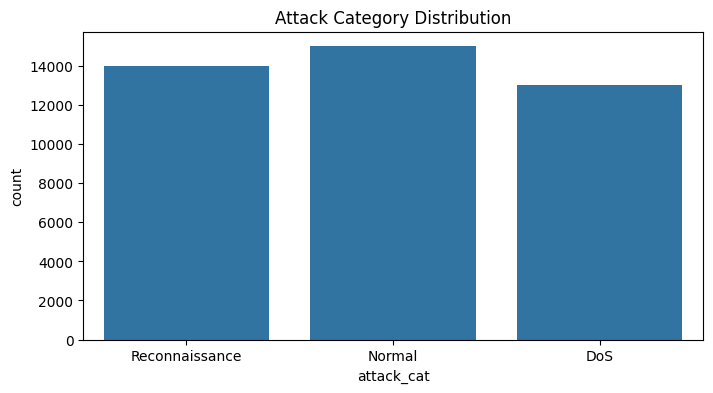

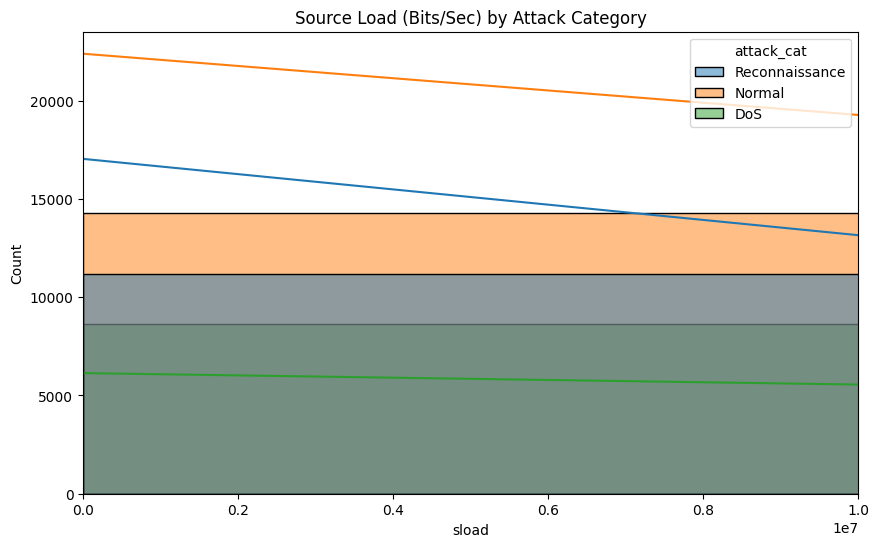

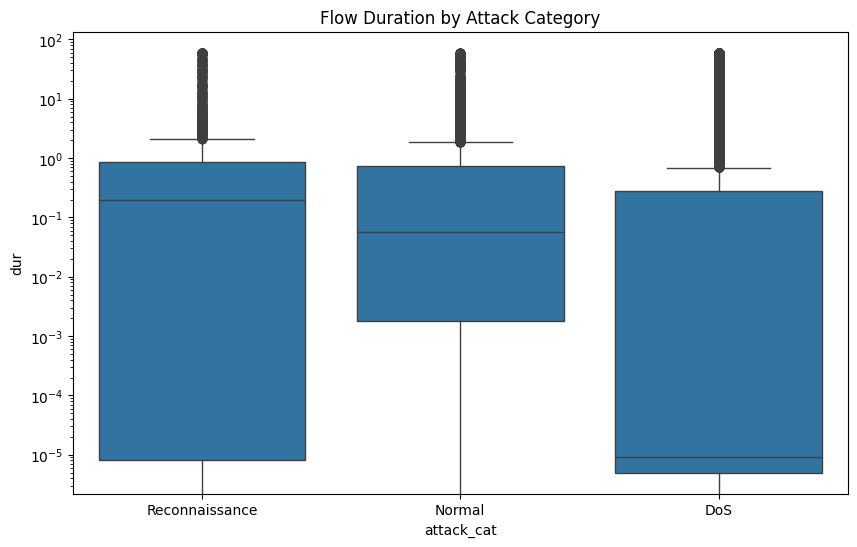

In [ ]:
# From previous: assume train_balanced and test_balanced are ready

# Use combined balanced for exploration
exploration_df = pd.concat([train_balanced, test_balanced], ignore_index=True)

# Basic stats for numerical columns
print("Numerical stats:\n", exploration_df.describe())

# Check for missing values
print("\nMissing values per column:\n", exploration_df.isnull().sum())

# Handle missings: Drop rows with any NaN (or fill with 0/mean if preferred)
exploration_df = exploration_df.dropna()
print("\nShape after dropping NaNs:", exploration_df.shape)

# Visualize: Import plotting libs
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of attack categories
plt.figure(figsize=(8, 4))
sns.countplot(x='attack_cat', data=exploration_df)
plt.title('Attack Category Distribution')
plt.show()

# Histogram of packet rates ('sload') by category (e.g., high for DoS)
plt.figure(figsize=(10, 6))
sns.histplot(data=exploration_df, x='sload', hue='attack_cat', bins=50, kde=True)
plt.title('Source Load (Bits/Sec) by Attack Category')
plt.xlim(0, 1e7)  # Limit x-axis for visibility
plt.show()

# Boxplot for duration by category (short for scans/floods)
plt.figure(figsize=(10, 6))
sns.boxplot(x='attack_cat', y='dur', data=exploration_df)
plt.title('Flow Duration by Attack Category')
plt.yscale('log')  # Log scale for outliers
plt.show()

In [ ]:
import pandas as pd
df = pd.concat([train_balanced, test_balanced], ignore_index=True)
# One record per attack category without deprecation warning
# Pick one full record for each attack category
sampled_df = df.groupby("attack_cat", group_keys=False).sample(n=1, random_state=42)

# Display all columns for each sampled record
pd.set_option("display.max_columns", None)  # so pandas shows all 45 columns
pd.set_option("display.width", 2000)
print(sampled_df)




           id       dur proto service state  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl         sload        dload  sloss  dloss     sinpkt     dinpkt         sjit         djit  swin       stcpb       dtcpb  dwin    tcprtt    synack    ackdat  smean  dmean  trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports      attack_cat  label
11431    5466  0.000008  unas       -   INT      2      0     200       0  125000.000300   254     0  1.000000e+08      0.00000      0      0   0.008000   0.000000     0.000000     0.000000     0           0           0     0  0.000000  0.000000  0.000000    100      0            0                  0           2             2           1                 1                 1               2             0           0                 0          19           2                0             DoS      1


**Key Features & Meanings**

spkts / dpkts → number of packets sent by source / destination.

sbytes / dbytes → bytes sent by source / destination.

synack / ackdat → handshake signals.

Normal: both > 0 (3-way handshake completes).

SYN flood: synack > 0, ackdat ≈ 0.

SYN/ACK ratio = SYNs received ÷ ACKs sent back.

Normal ≈ 1, Flood >> 1.

rate → packets per second.

sload / dload → bits/sec load from source / destination.

dur → flow duration.

state → connection status (e.g., INT, FIN, RST).

ct_src_dport_ltm / ct_dst_sport_ltm → how many distinct ports contacted

Port Scanning - patterns across IP + ports + handshake ratios + traffic size + timing.

Look at:

dsport → Is it a common service port (80, 443) or unusual?

spkts / sbytes → Large flood (DoS) vs tiny probe (Scan).

dur → Long (DoS) vs short (Scan).

state → Rejected/reset (Scan) vs half-open/retransmitted (DoS).

 Tie-breaker:

If short-lived, tiny flow, unusual port → Port Scanning.

If heavy packet counts, sustained duration, common service port → DoS.

In practice, you aggregate many per-row predictions to say “this is a scanning attack” or “this is a DoS attack

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/train_filtered.csv")

# Select features based on domain knowledge
selected_features = [
    # Volume / Rate
    'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload',
    # TCP handshake
    'synack', 'ackdat', 'state',
    # Timing / Duration
    'dur', 'sinpkt', 'dinpkt', 'sjit', 'djit',
    # Connection patterns
    'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',
    'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports',
    # Protocol / Service
    'proto', 'service'
]

df_selected = df[selected_features + ['label']]
print(df_selected.head())


   spkts  dpkts  sbytes  dbytes           rate         sload         dload    synack    ackdat state       dur      sinpkt      dinpkt         sjit        djit  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  ct_src_ltm  ct_srv_dst  is_sm_ips_ports proto   service  label
0      2      0     168       0  500000.001300  3.360000e+08  0.000000e+00  0.000000  0.000000   INT  0.000002    0.002000    0.000000     0.000000    0.000000           5             2           1                 1                 1               2           2           3                0   udp         -      1
1     10      6     534     268      25.241561  6.475302e+03  3.015525e+03  0.145015  0.056937   FIN  0.594258   62.124778   89.848398  3200.317190  137.022188           5             1           1                 1                 1               5           2           5                0   tcp         -      0
2     10      8     564     354      15.475831  3.699634e+

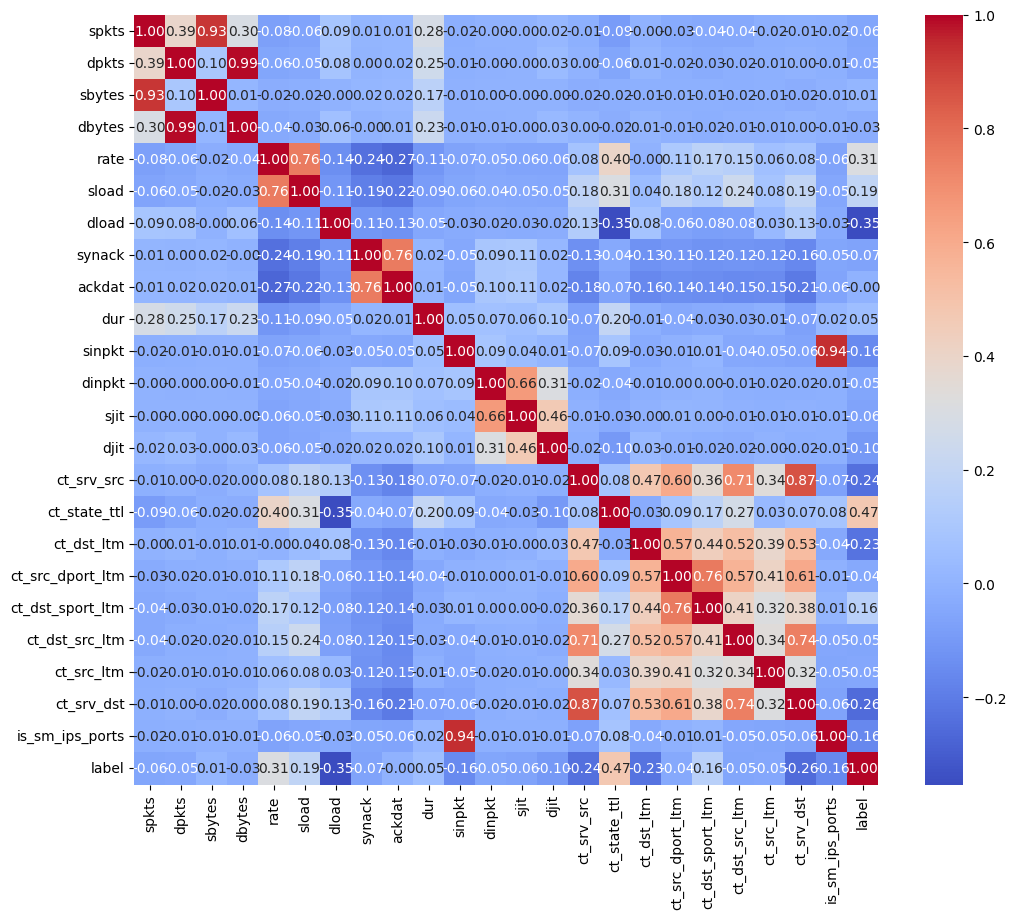

Dropped features due to high correlation: ['sbytes', 'dbytes', 'is_sm_ips_ports']


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
numeric_cols = df_selected.select_dtypes(include=np.number).columns
df_numeric = df_selected[numeric_cols]

corr_matrix = df_numeric.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Drop highly correlated features (>0.9)
upper = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.9)]
df_reduced = df_numeric.drop(columns=to_drop)
print("Dropped features due to high correlation:", to_drop)


sbytes            0.086943
dload             0.074677
ct_srv_dst        0.069643
ct_state_ttl      0.067463
sload             0.059475
ct_dst_src_ltm    0.056513
rate              0.055166
dur               0.052174
ct_srv_src        0.044691
dbytes            0.043347
dinpkt            0.042076
dpkts             0.036808
ackdat            0.031913
sinpkt            0.031410
synack            0.030408
state_INT         0.024152
spkts             0.021764
ct_dst_ltm        0.019603
sjit              0.019116
djit              0.013458
dtype: float64


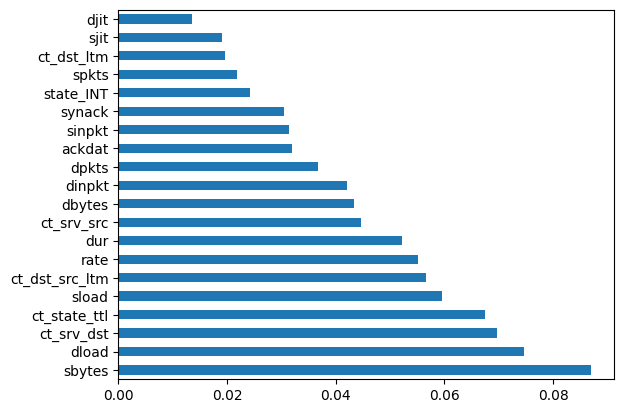

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and labels
X = df_selected.drop('label', axis=1)
y = df_selected['label']

# Encode categorical features if any
X = pd.get_dummies(X, drop_first=True)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False, inplace=True)
print(importances.head(20))

# Plot feature importance
importances.head(20).plot(kind='barh')
plt.show()


In [ ]:

df = pd.read_csv("/content/train_filtered.csv")
selected_features = [
    'spkts','dpkts','sbytes','dbytes','rate','sload','dload',
    'synack','ackdat','state',
    'dur','sinpkt','dinpkt','sjit','djit',
    'ct_srv_src','ct_state_ttl','ct_dst_ltm','ct_src_dport_ltm',
    'ct_dst_sport_ltm','ct_dst_src_ltm','ct_src_ltm','ct_srv_dst',
    'proto','service'
]

X_train = df[selected_features]
y_train = df['attack_cat']
df = pd.read_csv("/content/test_filtered.csv")
X_test = test_balanced[selected_features]
y_test = test_balanced['attack_cat']


In [ ]:
import pandas as pd

# Load train and test
train_df = pd.read_csv("/content/train_filtered.csv")
test_df = pd.read_csv("/content/test_filtered.csv")

selected_features = [
    'spkts','dpkts','sbytes','dbytes','rate','sload','dload',
    'synack','ackdat','state',
    'dur','sinpkt','dinpkt','sjit','djit',
    'ct_srv_src','ct_state_ttl','ct_dst_ltm','ct_src_dport_ltm',
    'ct_dst_sport_ltm','ct_dst_src_ltm','ct_src_ltm','ct_srv_dst',
    'proto','service'
]


def add_derived_features(df):
    df = df.copy()

    # Ratios
    df["pkt_ratio"] = df["spkts"] / (df["dpkts"] + 1)
    df["byte_ratio"] = df["sbytes"] / (df["dbytes"] + 1)

    # Handshake ratios
    df["syn_rate"] = df["synack"] / (df["spkts"] + 1)
    df["ack_rate"] = df["ackdat"] / (df["spkts"] + 1)

    # Average packet size
    df["avg_pkt_size"] = df["sbytes"] / (df["spkts"] + 1)


    return df

# Apply to train and test
train_df = add_derived_features(train_df)
test_df = add_derived_features(test_df)


derived_features = ["pkt_ratio", "byte_ratio", "syn_rate", "ack_rate", "avg_pkt_size"]
final_features = selected_features + derived_features

# Split into X and y
X_train = train_df[final_features]
y_train = train_df['attack_cat']

X_test = test_df[final_features]
y_test = test_df['attack_cat']

print("Final feature set:", len(final_features))
print(final_features)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Final feature set: 30
['spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload', 'synack', 'ackdat', 'state', 'dur', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'proto', 'service', 'pkt_ratio', 'byte_ratio', 'syn_rate', 'ack_rate', 'avg_pkt_size']
Train shape: (31200, 30) Test shape: (7800, 30)


In [ ]:
X_train.loc[:, 'bytes_per_pkt'] = (X_train['sbytes'] + X_train['dbytes']) / (X_train['spkts'] + X_train['dpkts'] + 1)
X_test.loc[:, 'bytes_per_pkt']  = (X_test['sbytes'] + X_test['dbytes']) / (X_test['spkts'] + X_test['dpkts'] + 1)

X_train.loc[:, 'pkt_size_ratio'] = X_train['sbytes'] / (X_train['dbytes'] + 1)
X_test.loc[:, 'pkt_size_ratio']  = X_test['sbytes'] / (X_test['dbytes'] + 1)

X_train.loc[:, 'port_diversity'] = (X_train['ct_src_dport_ltm'] + X_train['ct_dst_sport_ltm']) / (X_train['ct_srv_dst'] + 1)
X_test.loc[:, 'port_diversity']  = (X_test['ct_src_dport_ltm'] + X_test['ct_dst_sport_ltm']) / (X_test['ct_srv_dst'] + 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np

# Identify numeric columns
numeric_cols = X_train.select_dtypes(include=np.number).columns

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

X_train.loc[:, numeric_cols] = X_train_scaled
X_test.loc[:, numeric_cols] = X_test_scaled

categorical_cols = ['proto','service','state']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])


In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd


X_train_final = np.hstack([X_train[numeric_cols].values, X_train_encoded])
X_test_final = np.hstack([X_test[numeric_cols].values, X_test_encoded])

encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_train_final = pd.DataFrame(X_train_final, columns=list(numeric_cols) + list(encoded_feature_names))
X_test_final = pd.DataFrame(X_test_final, columns=list(numeric_cols) + list(encoded_feature_names))



In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_int = le.fit_transform(y_train)
y_test_int  = le.transform(y_test)
num_classes = len(le.classes_)
print("Classes:", list(le.classes_))


Classes: ['DoS', 'Normal', 'Reconnaissance']


In [ ]:
import numpy as np

n_features = X_train_final.shape[1]
timesteps = 1  # one-shot

X_train_seq = np.array(X_train_final, dtype=np.float32).reshape((-1, timesteps, n_features))
X_test_seq  = np.array(X_test_final,  dtype=np.float32).reshape((-1, timesteps, n_features))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

tf.random.set_seed(42)
np.random.seed(42)

model = Sequential([
    LSTM(64, input_shape=(timesteps, n_features)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss', patience=6, restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train_int)
cw = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_int)
class_weight = dict(zip(classes, cw))
print("Class weights:", class_weight)


Class weights: {np.int64(0): np.float64(1.0), np.int64(1): np.float64(1.0), np.int64(2): np.float64(1.0)}


In [ ]:
history = model.fit(
    X_train_seq, y_train_int,
    validation_split=0.2,      # or use a separate val set
    epochs=50,
    batch_size=128,
    class_weight=class_weight, # comment out if you don’t want weighting
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6582 - loss: 0.8859 - val_accuracy: 0.8242 - val_loss: 0.4873 - learning_rate: 0.0010
Epoch 2/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8298 - loss: 0.4746 - val_accuracy: 0.8456 - val_loss: 0.4239 - learning_rate: 0.0010
Epoch 3/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8434 - loss: 0.4251 - val_accuracy: 0.8508 - val_loss: 0.4008 - learning_rate: 0.0010
Epoch 4/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8500 - loss: 0.4034 - val_accuracy: 0.8544 - val_loss: 0.3888 - learning_rate: 0.0010
Epoch 5/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8531 - loss: 0.3948 - val_accuracy: 0.8575 - val_loss: 0.3817 - learning_rate: 0.0010
Epoch 6/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8553 - loss: 0.3847 - val_accuracy: 0.8596 - val_loss: 0.3759 - learning_rate: 0.0010
Epoch 7/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8567 - loss: 0.3791 - 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras_tuner as kt
import numpy as np

# Fix randomness for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# ----- Define Hyperparameterized Model -----
def build_model(hp):
    model = Sequential()
    # LSTM units
    units = hp.Choice('units', [32, 64, 128])
    model.add(LSTM(units, input_shape=(timesteps, n_features)))
    # Dropout
    model.add(Dropout(hp.Float('drop', 0.2, 0.5, step=0.1)))
    # Dense layer
    model.add(Dense(hp.Choice('dense', [32, 64, 128]), activation='relu'))
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Optimizer learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('lr', [1e-3, 5e-4, 1e-4])
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ----- Hyperparameter Tuning -----
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,              # number of configs to try
    executions_per_trial=1,     # average over runs per config
    directory='tuner_dir',
    project_name='lstm_tune'
)

tuner.search(
    X_train_seq, y_train_int,
    validation_split=0.2,
    epochs=20,
    batch_size=128,
    verbose=1
)

# ----- Get Best Hyperparameters -----
best_hp = tuner.get_best_hyperparameters(1)[0]
print("Best hyperparameters:", best_hp.values)

# ----- Build Best Model -----
model = tuner.hypermodel.build(best_hp)

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-5
)

# ----- Final Training with Best HPs -----
history = model.fit(
    X_train_seq, y_train_int,
    validation_split=0.2,   # or use a separate val set
    epochs=50,
    batch_size=128,
    class_weight=class_weight, # set if using imbalance handling
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Reloading Tuner from tuner_dir/lstm_tune/tuner0.json
Best hyperparameters: {'units': 64, 'drop': 0.2, 'dense': 64, 'lr': 0.001}
Epoch 1/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6535 - loss: 0.8801 - val_accuracy: 0.8385 - val_loss: 0.4506 - learning_rate: 0.0010
Epoch 2/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8381 - loss: 0.4542 - val_accuracy: 0.8619 - val_loss: 0.3967 - learning_rate: 0.0010
Epoch 3/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8529 - loss: 0.4090 - val_accuracy: 0.8668 - val_loss: 0.3763 - learning_rate: 0.0010
Epoch 4/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8586 - loss: 0.3901 - val_accuracy: 0.8732 - val_loss: 0.3642 - learning_rate: 0.0010
Epoch 5/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8640 - loss: 0.3755 - val_accuracy: 0.8763 - val_loss: 0.3536 - learning_rate: 0.0010
Epoch 6/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8696 - loss: 0.3649 - val_accuracy: 0.8824 - v

In [ ]:
!pip install keras-tuner --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


Balanced accuracy: 0.9046153846153846
                precision    recall  f1-score   support

           DoS       0.85      0.94      0.89      2600
        Normal       0.96      0.95      0.95      2600
Reconnaissance       0.91      0.83      0.87      2600

      accuracy                           0.90      7800
     macro avg       0.91      0.90      0.90      7800
  weighted avg       0.91      0.90      0.90      7800



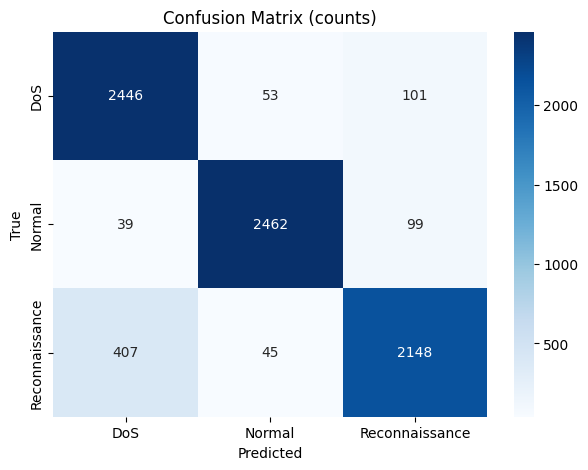

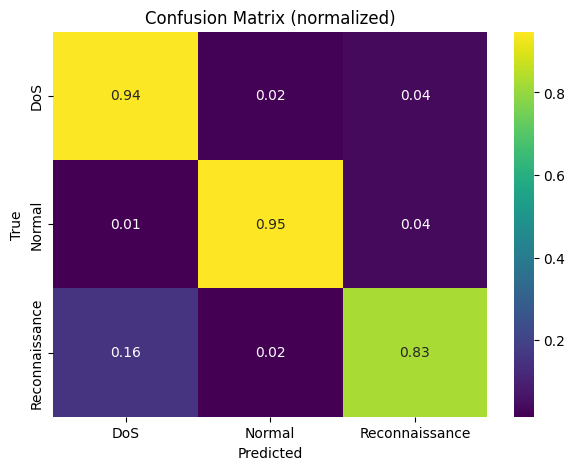

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
probs = model.predict(X_test_seq, verbose=0)   # shape (N, num_classes)
y_pred_int = np.argmax(probs, axis=1)

# Classification report
print("Balanced accuracy:", balanced_accuracy_score(y_test_int, y_pred_int))
print(classification_report(y_test_int, y_pred_int, target_names=le.classes_))

# Confusion matrix (absolute)
cm = confusion_matrix(y_test_int, y_pred_int)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix (counts)')
plt.show()

# Normalized confusion matrix by true class
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(7,5))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='viridis', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix (normalized)')
plt.show()


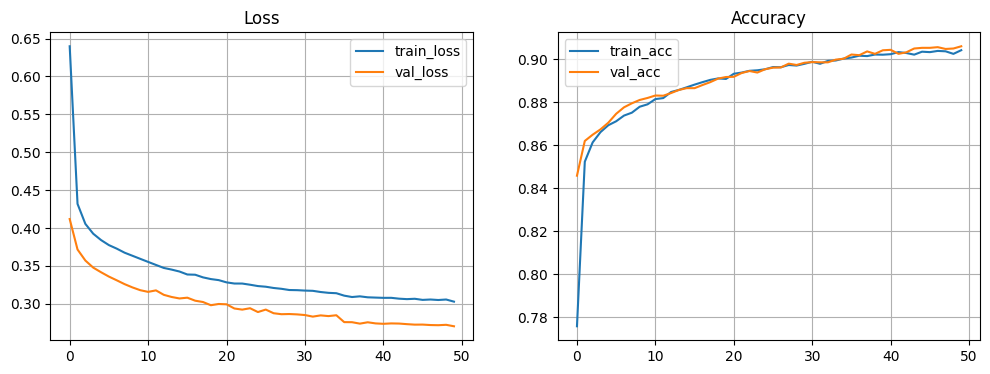

In [ ]:
# Plot loss and accuracy from history
hist = history.history
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(hist['loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss'); plt.grid(True)

plt.subplot(1,2,2)
plt.plot(hist['accuracy'], label='train_acc')
plt.plot(hist['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Accuracy'); plt.grid(True)

plt.show()
